# Creating Word Vectors with word2vec

Let's start with NLTK

#### Load Dependencies

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

Using TensorFlow backend.


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load Data

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### Tokenize Text

In [6]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
gberg_sent_tokens = sent_tokenize(gutenberg.raw(fileids=['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'carroll-alice.txt']))

In [7]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [8]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [9]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [10]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [11]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
gberg_sents = gutenberg.sents(fileids=['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'carroll-alice.txt'])

In [12]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [13]:
gberg_sents[4][14]

'father'

In [14]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [15]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
len(gutenberg.words(fileids=['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'carroll-alice.txt']))

466284

#### Run Word2Vec

In [16]:
# size == dimensions
# window 10: 20 context words, 10 to the left and 10 to the right
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=2)

In [17]:
# We don't have to save the model if we don't want to. It's being done here as demonstration.
model.save('raw_gutenberg_model.w2v')

#### Explore the Model

In [18]:
model = Word2Vec.load('raw_gutenberg_model.w2v')

In [19]:
model['house']

array([ 0.43951929,  0.20345363, -0.12350496, -0.22693247,  0.13012436,
        0.43263096, -0.06086079, -0.28693768,  0.03658728, -0.16363265,
        0.08530718,  0.17591736,  0.02361562, -0.12141223,  0.19483131,
       -0.12127479, -0.3244608 ,  0.76228642,  0.12957637, -0.40177354,
        0.10379501, -0.20748216, -0.10074964, -0.21412633,  0.14703584,
        0.05053272, -0.01361896,  0.10677844,  0.40056241, -0.0289387 ,
        0.10345098,  0.31935829,  0.07284847, -0.09583906,  0.34848803,
       -0.49537802,  0.18112972, -0.3836998 ,  0.10134034,  0.11419357,
        0.63601786, -0.12048271,  0.28826013,  0.25589827,  0.17686081,
       -0.11655235, -0.09858518,  0.07610506,  0.27675855,  0.12048908,
       -0.13589375,  0.37858659, -0.1755271 , -0.07064102, -0.38758591,
        0.02026783,  0.26397982, -0.09220792, -0.06000375,  0.17543206,
       -0.18837382, -0.09307611, -0.14029233, -0.04388688], dtype=float32)

In [20]:
len(model['house'])

64

In [21]:
model.most_similar('house')

[('Place', 0.811130166053772),
 ('shop', 0.8057742714881897),
 ('dining', 0.7984946966171265),
 ('Camden', 0.793912410736084),
 ('drove', 0.7894566059112549),
 ('card', 0.7870776057243347),
 ('carriages', 0.7848575115203857),
 ('landau', 0.7848074436187744),
 ('doors', 0.7846565246582031),
 ('dressing', 0.7832915782928467)]

In [22]:
model.most_similar('think')

[('grant', 0.8283084630966187),
 ('agree', 0.816801905632019),
 ('manage', 0.8121541738510132),
 ('deny', 0.8087695837020874),
 ('expect', 0.8077518939971924),
 ('pretend', 0.8055640459060669),
 ('hesitate', 0.8037261962890625),
 ('forgive', 0.7959498167037964),
 ('venture', 0.7946842312812805),
 ('suppose', 0.7916132211685181)]

In [23]:
model.most_similar('day')

[('evening', 0.8378722071647644),
 ('morning', 0.8360257744789124),
 ('night', 0.7744661569595337),
 ('month', 0.7601619958877563),
 ('spend', 0.7497485876083374),
 ('next', 0.7461041212081909),
 ('Box', 0.7449760437011719),
 ('week', 0.7388782501220703),
 ('afternoon', 0.7373006343841553),
 ('Saturday', 0.7325820922851562)]

In [24]:
model.most_similar('father')

[('mother', 0.8715599775314331),
 ('aunt', 0.8328174352645874),
 ('brother', 0.8229626417160034),
 ('husband', 0.8143963813781738),
 ('wishes', 0.8131052851676941),
 ('sister', 0.8092051148414612),
 ('sake', 0.7808470129966736),
 ('Isabella', 0.7767211198806763),
 ('uncle', 0.7749599814414978),
 ('daughter', 0.7736835479736328)]

In [25]:
model.doesnt_match('mother father daughter house'.split())

'house'

In [26]:
model.similarity('father', 'house')

0.52142599915970789

In [27]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

[('mother', 0.7976123690605164),
 ('husband', 0.7698510885238647),
 ('sister', 0.7507162094116211),
 ('aunt', 0.7425578832626343),
 ('wishes', 0.7321113348007202),
 ('friend', 0.7317440509796143),
 ('daughter', 0.7195297479629517),
 ('nurse', 0.7042011618614197),
 ('sake', 0.6932041645050049),
 ('affections', 0.6879606246948242)]

In [28]:
model.most_similar(positive=['son', 'woman'], negative=['man'])

[('law', 0.7740381956100464),
 ('daughter', 0.7688101530075073),
 ('Wallis', 0.7640249729156494),
 ('friend', 0.7596955299377441),
 ('brother', 0.7563303709030151),
 ('nurse', 0.7447747588157654),
 ('husband', 0.744299054145813),
 ('eldest', 0.7153913974761963),
 ('Harville', 0.7145655155181885),
 ('daughters', 0.7111117243766785)]

In [29]:
model.most_similar(positive=['husband', 'woman'], negative=['man'])

[('sister', 0.752424955368042),
 ('friend', 0.7332223653793335),
 ('father', 0.726719319820404),
 ('mother', 0.7208641767501831),
 ('nurse', 0.7087678909301758),
 ('daughter', 0.7065379619598389),
 ('wishes', 0.7026852369308472),
 ('particularly', 0.6882469654083252),
 ('patience', 0.6876028776168823),
 ('wishing', 0.6839585304260254)]

In [30]:
model.most_similar(positive=['father', 'woman'], negative=['man'], topn=30)

[('mother', 0.7976123690605164),
 ('husband', 0.7698510885238647),
 ('sister', 0.7507162094116211),
 ('aunt', 0.7425578832626343),
 ('wishes', 0.7321113348007202),
 ('friend', 0.7317440509796143),
 ('daughter', 0.7195297479629517),
 ('nurse', 0.7042011618614197),
 ('sake', 0.6932041645050049),
 ('affections', 0.6879606246948242),
 ('brother', 0.6861639618873596),
 ('Isabella', 0.6848157048225403),
 ('rights', 0.6789318323135376),
 ('patience', 0.678371787071228),
 ('neighbour', 0.673454225063324),
 ('exertions', 0.6703362464904785),
 ('intentions', 0.6690245866775513),
 ('health', 0.6670863032341003),
 ('blind', 0.6649085283279419),
 ('heart', 0.6615605354309082),
 ('excuses', 0.6606819033622742),
 ('mistress', 0.658902645111084),
 ('own', 0.6567113399505615),
 ('kindness', 0.6549253463745117),
 ('care', 0.6526315212249756),
 ('companion', 0.6516454815864563),
 ('daughters', 0.6496641635894775),
 ('sons', 0.646655797958374),
 ('uneasy', 0.646139919757843),
 ('law', 0.6459567546844482)]

#### Reduce word vector dimensionality with t-SNE

t-Distributed Stochastic Name Embedding

In [31]:
len(model.wv.vocab)

4417

In [32]:
X = model[model.wv.vocab]

In [33]:
tsne = TSNE(n_components=2, n_iter=200)

In [34]:
X_2d = tsne.fit_transform(X)

In [35]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [36]:
coords_df.head()

,x,y,token
0,4.060119,3.531895,[
1,-5.069000,-1.089669,Emma
2,-2.563363,4.977559,by
3,-3.506618,-4.016578,Jane
4,0.324197,-4.388295,I


In [37]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualise 2D representation of word vectors

In [38]:
coorrds_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [39]:
coords_df.head()

,x,y,token
0,4.060119,3.531895,[
1,-5.069000,-1.089669,Emma
2,-2.563363,4.977559,by
3,-3.506618,-4.016578,Jane
4,0.324197,-4.388295,I


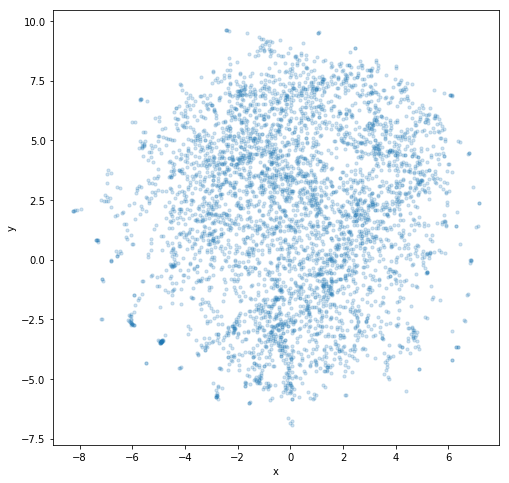

In [40]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8,8), marker='o', s=10, alpha=0.2)

In [41]:
output_notebook()

Loading BokehJS ...

In [42]:
subset_df = coords_df.sample(n=500)

In [43]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [44]:
show(p)